In [1]:
import pandas as pd
import numpy as np
from km import KMeans
from SVD import Matrix
import matplotlib.pyplot as plt
import math

C:\Users\Srinivasan M\AppData\Local\Temp\ipykernel_15716\52123672.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def load_data(file_path):
    return pd.read_csv(file_path)


In [3]:
file_path = "./EncodedCombined2.csv"  # Replace with your dataset file path
data = load_data(file_path)

avg_rating = load_data("./Genre_Rating.csv")
# Assuming the data matrix is constructed with users as rows and movies as columns
data_matrix = data  # Exclude first column (user IDs)
# data_matrix.drop(columns=["Zip-code","Title"],inplace=True)
print(data_matrix)


        UserID  MovieID  Rating  Action  Adventure  Animation  Children's  \
0            1     1193       5       0          0          0           0   
1            1      661       3       0          0          1           1   
2            1      914       3       0          0          0           0   
3            1     3408       4       0          0          0           0   
4            1     2355       5       0          0          1           1   
...        ...      ...     ...     ...        ...        ...         ...   
817057    3537     3830       1       0          0          0           0   
817058    3537     3626       1       0          0          0           0   
817059    3537     3721       1       0          0          0           0   
817060    3537     2773       1       0          0          0           0   
817061    3537     3800       1       0          0          0           0   

        Comedy  Crime  Documentary  ...  Musical  Mystery  Romance  Sci-Fi 

In [4]:
newUserID=7000
newUserMovies={
    25 : 4.0,
    54 : 5.0,
    65: 3.0,
    1200 : 4.0,
    3200 : 5.0,
    2980 : 1.0,
    99 : 2.0,
    455 : 2.0 
}
newUserDetails = {
    'Age' : 18,
    'Gender' : 0,
    'Occupation' : 17
}


movieDetails=pd.read_csv("movies.csv")
movieDetails=movieDetails.set_index(keys='MovieID')
columns = ["UserID","MovieID","Rating","Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical",
"Mystery","Romance","Sci-Fi","Thriller","War","Western" , "Gender", "Age", "Occupation"]

Rows=[]
for movieId,Rating in newUserMovies.items():
    newRow={}
    movie=movieDetails.loc[movieId]
    genres = movie['Genres'].split('|')
    newRow["UserID"]=newUserID
    newRow["MovieID"]=movieId
    newRow["Rating"]=Rating
    for genre in genres:
        newRow[genre]=int(1)
    for key, value in newUserDetails.items():
        newRow[key]=int(value)
    Rows.append(newRow)

newUserdf=pd.DataFrame(Rows,columns=columns)
newUserdf=newUserdf.fillna(int(0))

data_matrix=pd.concat([data_matrix,newUserdf])
data_matrix=data_matrix.drop_duplicates()
data_matrix

,UserID,MovieID,Rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender,Age,Occupation
0,1,1193,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,10
1,1,661,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,10
2,1,914,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,10
3,1,3408,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,10
4,1,2355,5.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,7000,1200,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,18,17
4,7000,3200,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18,17
5,7000,2980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18,17
6,7000,99,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18,17


In [5]:
# Convert MovieID and UserID to int16
data_matrix["MovieID"] = data_matrix["MovieID"].astype(np.int16)
data_matrix["UserID"] = data_matrix["UserID"].astype(np.int16)
for col in data_matrix.columns:
    if col != "MovieID" and col != "UserID":
        data_matrix[col] = data_matrix[col].astype(np.int8)
print(data_matrix.dtypes)

UserID         int16
MovieID        int16
Rating          int8
Action          int8
Adventure       int8
Animation       int8
Children's      int8
Comedy          int8
Crime           int8
Documentary     int8
Drama           int8
Fantasy         int8
Film-Noir       int8
Horror          int8
Musical         int8
Mystery         int8
Romance         int8
Sci-Fi          int8
Thriller        int8
War             int8
Western         int8
Gender          int8
Age             int8
Occupation      int8
dtype: object


In [6]:
df=data_matrix
# Initialize an empty dictionary to store genre-wise ratings for each user
genre_ratings = {}
genres = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    user_id = row['UserID']
    rating = row['Rating']
    # Iterate over each genre and update the genre_ratings dictionary
    for genre in genres:
        if genre not in genre_ratings:
            genre_ratings[genre] = {}
        if user_id not in genre_ratings[genre]:
            genre_ratings[genre][user_id] = {'total_rating': 0, 'count': 0}
        if row[genre] == 1:  # Check if the movie belongs to the genre
            genre_ratings[genre][user_id]['total_rating'] += rating
            genre_ratings[genre][user_id]['count'] += 1

# Initialize an empty dictionary to store the final DataFrame values
data = {}

# Iterate over each user and calculate the average rating for each genre
for user_id in set(df['UserID']):
    user_data = {}
    for genre, values in genre_ratings.items():
        if user_id in values and values[user_id]['count']>0:
            user_data[genre] = values[user_id]['total_rating'] / values[user_id]['count']
        else:
            user_data[genre] = np.nan
    data[user_id] = user_data

# Create the final DataFrame
result_df = pd.DataFrame.from_dict(data, orient='index')

In [7]:
data_mat=result_df
data_mat=data_mat.sort_index()
data_mat

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,NaN,4.428571,4.000000,NaN,NaN,4.285714,NaN,3.666667,4.333333,3.666667,5.000000,NaN
2,3.500000,3.736842,NaN,NaN,3.560000,3.583333,NaN,3.898734,3.000000,4.000000,3.000000,NaN,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.000000,3.766667,NaN,NaN,4.000000,4.500000,NaN,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,NaN,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
6,4.000000,3.750000,4.222222,3.875000,3.750000,3.000000,NaN,3.727273,3.000000,NaN,NaN,4.315789,NaN,4.000000,3.500000,3.666667,4.000000,3.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.634921,3.000000,3.250000,2.035714,2.246154,3.150000,NaN,3.116071,3.083333,3.000000,2.333333,1.500000,3.300000,3.047619,2.762500,1.972973,3.307692,2.333333
6036,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.000000,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857
6037,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.250000,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000
6040,2.976190,2.818182,3.000000,4.000000,3.274510,3.920000,4.500000,3.821622,3.500000,4.000000,2.590909,4.000000,4.454545,3.488889,3.473684,3.926829,3.695652,4.000000


In [8]:
user_ids = set(df['UserID'])
user_ids=sorted(user_ids)
user_ids

[1,
 2,
 3,
 5,
 6,
 8,
 9,
 10,
 11,
 13,
 15,
 17,
 18,
 19,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 33,
 35,
 36,
 37,
 38,
 39,
 42,
 44,
 45,
 48,
 49,
 52,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 65,
 67,
 68,
 69,
 70,
 73,
 75,
 76,
 78,
 82,
 83,
 87,
 88,
 90,
 92,
 93,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 105,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 126,
 127,
 129,
 130,
 131,
 132,
 135,
 136,
 137,
 138,
 139,
 140,
 143,
 146,
 147,
 148,
 149,
 150,
 151,
 155,
 156,
 157,
 161,
 162,
 163,
 165,
 166,
 167,
 169,
 170,
 174,
 175,
 176,
 178,
 180,
 181,
 182,
 183,
 186,
 187,
 188,
 190,
 192,
 193,
 194,
 195,
 198,
 199,
 201,
 202,
 203,
 204,
 205,
 208,
 210,
 212,
 214,
 216,
 218,
 220,
 222,
 223,
 224,
 225,
 229,
 230,
 231,
 232,
 233,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 244,
 245,
 249,
 251,
 252,
 253,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 265,
 267,
 268,
 270,
 271,
 273,
 274,

In [9]:
def get_non_zero_eigenvalues(Sigma):
    # Extract diagonal elements of Sigma
    diagonal_elements = np.diag(Sigma)

    # Filter out values not close to zero
    non_zero_eigenvalues = [eigenvalue for eigenvalue in diagonal_elements if not math.isclose(eigenvalue, 0)]

    return non_zero_eigenvalues


In [10]:
avg_rating

,Genre,Avg. Rating
0,Horror,3.215013
1,Children's,3.422035
2,Fantasy,3.447371
3,Sci-Fi,3.466521
4,Adventure,3.477257
5,Action,3.491185
6,Comedy,3.522099
7,Thriller,3.570466
8,Romance,3.607465
9,Western,3.637770


In [11]:
avgdict = avg_rating.set_index('Genre')['Avg. Rating'].to_dict()
avg_dict = {key: float(value)  for key, value in avgdict.items() if value != 'Avg. Rating'}


A_mat = data_mat
A_watched=data_matrix.pivot(index='UserID', columns='MovieID', values='Rating')
# print(avg_dict)
A_mat= A_mat.fillna(avg_dict)
A_np=A_mat.values
A_np

array([[4.2       , 4.        , 4.11111111, ..., 3.66666667, 5.        ,
        3.63777015],
       [3.5       , 3.73684211, 3.68486822, ..., 3.48387097, 3.73333333,
        4.33333333],
       [3.95652174, 4.        , 4.        , ..., 3.8       , 4.        ,
        4.66666667],
       ...,
       [3.64285714, 4.        , 4.        , ..., 3.70588235, 4.        ,
        3.75      ],
       [2.97619048, 2.81818182, 3.        , ..., 3.92682927, 3.69565217,
        4.        ],
       [4.        , 2.        , 3.68486822, ..., 4.        , 4.        ,
        3.63777015]])

In [12]:
A_mat=A_mat.round(2)
# print(A_mat.dtypes)
A_mat

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,4.20,4.00,4.11,4.25,4.14,4.00,3.93,4.43,4.00,4.08,3.22,4.29,3.67,3.67,4.33,3.67,5.00,3.64
2,3.50,3.74,3.68,3.42,3.56,3.58,3.93,3.90,3.00,4.00,3.00,3.67,3.33,3.71,3.59,3.48,3.73,4.33
3,3.96,4.00,4.00,4.00,3.77,3.71,3.93,4.00,4.50,4.08,2.67,4.00,3.00,3.80,3.83,3.80,4.00,4.67
5,2.61,3.00,4.00,3.83,3.41,3.29,3.67,3.10,3.45,4.00,2.80,3.33,3.12,3.10,3.07,2.85,3.50,4.00
6,4.00,3.75,4.22,3.88,3.75,3.00,3.93,3.73,3.00,4.08,3.22,4.32,3.67,4.00,3.50,3.67,4.00,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.63,3.00,3.25,2.04,2.25,3.15,3.93,3.12,3.08,3.00,2.33,1.50,3.30,3.05,2.76,1.97,3.31,2.33
6036,3.00,2.99,3.91,3.44,3.20,3.53,3.91,3.51,3.00,4.06,2.99,3.71,3.41,3.35,2.83,3.14,3.79,3.64
6037,3.64,4.00,4.00,3.67,3.58,3.83,4.00,3.88,4.25,3.44,4.11,4.00,3.69,3.68,3.69,3.71,4.00,3.75
6040,2.98,2.82,3.00,4.00,3.27,3.92,4.50,3.82,3.50,4.00,2.59,4.00,4.45,3.49,3.47,3.93,3.70,4.00


In [13]:
A = Matrix(A_mat)
U,Sigma,V = A.svd()

non_zero_diag = get_non_zero_eigenvalues(Sigma)
print("This is nonzero diag")
print(non_zero_diag)
U_red,Sigma_red,V_red = A.randomized_svd(len(non_zero_diag))  # Number of components for SVD 

ATA
                 Action   Adventure   Animation  Children's      Comedy  \
Action       49223.6405  48853.6619  50108.8692  47974.6068  49351.9464   
Adventure    48853.6619  48906.5399  49945.4103  47866.2680  49127.6656   
Animation    50108.8692  49945.4103  52860.1953  49819.5181  50747.5798   
Children's   47974.6068  47866.2680  49819.5181  48328.1237  48550.6008   
Comedy       49351.9464  49127.6656  50747.5798  48550.6008  50062.0282   
Crime        51077.7019  50733.7495  52336.7177  50010.8058  51554.3106   
Documentary  52486.5687  52219.1638  54085.4731  51572.7350  53123.4019   
Drama        51906.2380  51632.8658  53301.7843  50930.9745  52463.4049   
Fantasy      48483.6944  48359.8225  49751.3350  47802.1550  48905.3239   
Film-Noir    54290.4506  54009.6413  55962.5981  53260.7742  54902.9909   
Horror       45477.0870  45209.5061  46556.2523  44505.9364  45880.5972   
Musical      49919.9476  49756.7609  51642.5492  49454.2599  50563.5516   
Mystery      50576.97

In [14]:
np.savetxt('U_red_Kmeans.txt', U_red)
np.savetxt('Sigma_red_Kmeans.txt', Sigma_red)
np.savetxt('V_red_Kmeans.txt', V_red)

In [15]:
U_red = np.loadtxt('U_red_Kmeans.txt')
Sigma_red = np.loadtxt('Sigma_red_Kmeans.txt')
V_red = np.loadtxt('V_red_Kmeans.txt')
print(U_red.shape)
print(Sigma_red.shape)
print(V_red.shape)

(3744, 18)
(18, 18)
(18, 18)


In [16]:
def elbow_method(data, max_clusters=4 , skip_factor=1):
    distortions = []
    # Generate x-axis values with skip_factor increments
    x_values = range(skip_factor, max_clusters + 1, skip_factor)
    for i in x_values:
        km = KMeans(i)
        km.fit(data)
        distortions.append(km.get_cost())  # km.inertia_ gives the distortion (cost)
    # Plotting the elbow curve
    plt.plot(x_values, distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

new_mat = U_red
new_mat
# Assuming your data is in V_red_T
# Perform Elbow Method


array([[ 0.01782301,  0.01557269, -0.00324472, ...,  0.02261527,
         0.00298825, -0.02565377],
       [ 0.01599256, -0.00139236, -0.00187493, ...,  0.00641994,
        -0.01468765,  0.00014874],
       [ 0.01710045,  0.01796254, -0.01262025, ...,  0.00353587,
        -0.00366921, -0.00667776],
       ...,
       [ 0.01687309,  0.01052901, -0.01277431, ...,  0.00296522,
        -0.01488838,  0.00964664],
       [ 0.01608597, -0.0062447 ,  0.01383409, ..., -0.00739218,
        -0.01557126,  0.01916338],
       [ 0.01566989,  0.00471562, -0.01808464, ..., -0.0449225 ,
         0.09964024, -0.01393147]])

sample_points_ids
[2416, 1875, 3295]
the tuples
(0.01644096963945356, -0.0016287603644058685, 0.0022304414342122635, -0.00895418293608855, -0.008039668467372937, -0.014495337994108293, 0.0013064236771839787, -0.00819607178310238, -0.005465784220918844, -0.004506843949496084, 0.0009187230223159456, 0.004682037330245316, 0.005885261266747221, -0.014916396480557943, 0.00010552329172656268, 0.015858958827127307, -0.0003693428117226632, -0.015272627296693573)
Distance Matrix
[[0.05822376 0.06582899 0.0815138 ]
 [0.05222906 0.06469052 0.0716562 ]
 [0.06617945 0.06871377 0.0837363 ]
 ...
 [0.04459493 0.06785603 0.07821928]
 [0.09398853 0.09446022 0.0832253 ]
 [0.1596145  0.1551361  0.16059568]]
closest
[0 0 0 ... 0 2 1]
Distance Matrix
[[0.05912844 0.06013201 0.06740003]
 [0.03661775 0.04338995 0.04659101]
 [0.04883076 0.0478023  0.05556804]
 ...
 [0.03938386 0.05192203 0.05594761]
 [0.07338605 0.07167133 0.06359068]
 [0.14580865 0.14355887 0.14481297]]
closest
[0 0 1 ... 0 2 1]
Distance Matr

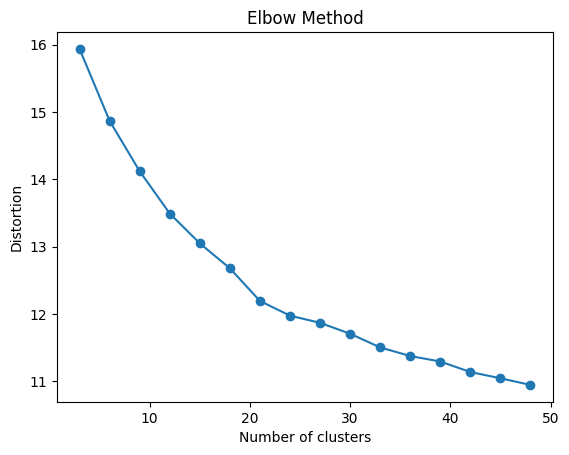

In [17]:
elbow_method(U_red,50,3)

In [18]:
km = KMeans(50)
km.fit(U_red)

sample_points_ids
[2430, 1735, 2824, 996, 1276, 2931, 1920, 3469, 3353, 584, 2422, 2504, 1956, 2415, 826, 3513, 3298, 3374, 1300, 1249, 1962, 3099, 2826, 2857, 1685, 834, 275, 175, 2127, 3676, 3403, 3722, 1899, 2452, 1761, 2803, 3388, 326, 2836, 2196, 2916, 2950, 1248, 1927, 2929, 249, 849, 1198, 1265, 2310]
the tuples
(0.017992476961980048, 0.01595547107660624, 0.02109437168067066, -0.04711879643092527, 0.0081274393708608, 0.031256230699285265, -0.0002510693309865484, -0.00589151356787278, 0.010131749451067186, -0.0010710642535901513, 0.008372532325320724, -0.0005479627754276341, 0.021518443403896827, 0.006098878673145645, 0.0036044250495575712, 0.003467567381428912, -0.011751276560013062, -0.006823541965022589)
Distance Matrix
[[0.07647836 0.10086818 0.07268472 ... 0.127764   0.0748017  0.10320782]
 [0.09381573 0.06939583 0.06599721 ... 0.09820974 0.05580218 0.08564799]
 [0.08839569 0.08398339 0.08587986 ... 0.10074966 0.066599   0.0836379 ]
 ...
 [0.07808924 0.06518255 0.07857891 ..

In [19]:
# Recommend movies for a particular user
def recommend_movies(user_id, data, users_watched,user_idx,cluster_labels):
    user_cluster = cluster_labels[user_idx[user_id]]
    # print(user_cluster)
    cluser_users = []
    index = []
    for row,cluster in cluster_labels.items():
        # if cluster == user_cluster and row!=user_idx[user_id]:
        if cluster == user_cluster:
            cluser_users.append(users_watched.iloc[row])
            # index.append(users_watched.index[row])
            index.append(row) 

    rating_movie = {}
    movie_rating_count={}
    for df in cluser_users:
        for key,value in df[df.notnull()].items():
            if int(key) not in rating_movie:
                rating_movie[int(key)] = 0
                movie_rating_count[int(key)] = 0
            
            rating_movie[int(key)]+=float(value)
            movie_rating_count[int(key)]+=1

    for key,value in movie_rating_count.items():
        if(value>0):
            rating_movie[key]=rating_movie[key]/float(value)

    final_list = sorted(rating_movie.items(), key=lambda x: x[1],reverse=True)

    movies=pd.read_csv("movies.csv")
    movies=movies.set_index(keys=['MovieID'])
    recommendations=[]
    for x in final_list:
        movie=movies.loc[x[0]]
        recommendations.append([x[0],x[1],movie['Title'],movie['Genres']])

    return recommendations

In [20]:
cluster_labels = km.get_pointCluster()

user_index = {}
i =0
for x in user_ids:
    user_index[int(x)] = i 
    i+=1

print(f"Cluster Labels: {cluster_labels}")
print(f"User_Index : {user_index}")
# User ID for which we want to recommend movies
user_id = newUserID  # Replace with the desired user ID

# Recommend movies for the user
recommended_movies = recommend_movies(user_id, new_mat,A_watched,user_index,cluster_labels)
print("Recommended movies for User", user_id)
for movie in recommended_movies[:5]:  # Display top 10 recommended movies
    print(f"Title : {movie[2]} , MovieID : {movie[0]} , Rating : {movie[1]} , Genres : {movie[3]}")  # Assuming the first column is movie titles


Cluster Labels: {0: 35, 1: 41, 2: 14, 3: 18, 4: 44, 5: 37, 6: 17, 7: 3, 8: 47, 9: 3, 10: 9, 11: 46, 12: 11, 13: 39, 14: 35, 15: 8, 16: 16, 17: 41, 18: 2, 19: 4, 20: 35, 21: 21, 22: 3, 23: 4, 24: 20, 25: 44, 26: 23, 27: 35, 28: 5, 29: 21, 30: 22, 31: 23, 32: 11, 33: 48, 34: 32, 35: 24, 36: 23, 37: 49, 38: 31, 39: 18, 40: 6, 41: 46, 42: 11, 43: 7, 44: 8, 45: 1, 46: 41, 47: 13, 48: 36, 49: 11, 50: 3, 51: 39, 52: 30, 53: 26, 54: 15, 55: 41, 56: 13, 57: 10, 58: 5, 59: 35, 60: 10, 61: 28, 62: 48, 63: 48, 64: 13, 65: 45, 66: 15, 67: 11, 68: 4, 69: 26, 70: 49, 71: 42, 72: 0, 73: 49, 74: 37, 75: 1, 76: 35, 77: 39, 78: 43, 79: 10, 80: 15, 81: 6, 82: 5, 83: 12, 84: 43, 85: 23, 86: 35, 87: 39, 88: 7, 89: 15, 90: 20, 91: 31, 92: 49, 93: 43, 94: 37, 95: 49, 96: 15, 97: 40, 98: 5, 99: 35, 100: 43, 101: 17, 102: 23, 103: 37, 104: 17, 105: 49, 106: 31, 107: 5, 108: 35, 109: 3, 110: 38, 111: 29, 112: 46, 113: 39, 114: 44, 115: 18, 116: 30, 117: 17, 118: 7, 119: 3, 120: 42, 121: 44, 122: 18, 123: 33, 124

In [21]:
df=A_watched.loc[user_id]
result_map = {}

for key,value in df[df.notnull()].items():
    result_map[key] = value

movies=pd.read_csv("movies.csv")
movies=movies.set_index(keys=['MovieID'])
result_map=dict(sorted(result_map.items(), key=lambda item: item[1],reverse=True))

movies_currently_watched=[]
for movieID,rating in result_map.items():
    movie=movies.loc[movieID]
    movies_currently_watched.append([movieID,rating,movie['Title'],movie['Genres']])

print("Movies Watched by User :", user_id)
for movie in movies_currently_watched:  # Display top 10 recommended movies
    print(f"Title : {movie[2]} , MovieID : {movie[0]} , Rating : {movie[1]} , Genres : {movie[3]}")  # Assuming the first column is movie titles

Movies Watched by User : 7000
Title : Big Green, The (1995) , MovieID : 54 , Rating : 5.0 , Genres : Children's|Comedy
Title : Last Detail, The (1973) , MovieID : 3200 , Rating : 5.0 , Genres : Comedy|Drama
Title : Leaving Las Vegas (1995) , MovieID : 25 , Rating : 4.0 , Genres : Drama|Romance
Title : Aliens (1986) , MovieID : 1200 , Rating : 4.0 , Genres : Action|Sci-Fi|Thriller|War
Title : Bio-Dome (1996) , MovieID : 65 , Rating : 3.0 , Genres : Comedy
Title : Heidi Fleiss: Hollywood Madam (1995) , MovieID : 99 , Rating : 2.0 , Genres : Documentary
Title : Free Willy (1993) , MovieID : 455 , Rating : 2.0 , Genres : Adventure|Children's|Drama
Title : Men Cry Bullets (1997) , MovieID : 2980 , Rating : 1.0 , Genres : Drama
